1. It's a great algorythm in medical field or anywhere where you need to understand **the why**
1. It works well with both categories and numbers
1. Doesn't need as much preprocessing as other datas

In [43]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')
df_train.drop(labels=["PassengerId","Unnamed: 0","Pclass_3","Title_1", "Title_2", "Title_3", "Title_4", "Emb_1", "Emb_2", "Emb_3"],axis="columns",inplace=True)
df_test.drop(labels=["PassengerId","Unnamed: 0","Pclass_3","Title_1", "Title_2", "Title_3", "Title_4", "Emb_1", "Emb_2", "Emb_3"],axis="columns",inplace=True)

df_train
# df_test

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Family_size
0,0,1,0.2750,0.014151,0,0,0.1
1,1,0,0.4750,0.139136,1,0,0.1
2,1,0,0.3250,0.015469,0,0,0.0
3,1,0,0.4375,0.103644,1,0,0.1
4,0,1,0.4375,0.015713,0,0,0.0
...,...,...,...,...,...,...,...
787,0,1,0.1000,0.056848,0,0,0.5
788,1,1,0.0125,0.040160,0,0,0.3
789,0,1,0.5750,0.154588,1,0,0.0
790,0,1,0.3500,0.015127,0,0,0.0


## How to show the count

In [44]:
df_train.groupby('Sex')['Sex'].agg('count')

Sex
0    279
1    513
Name: Sex, dtype: int64

In [45]:
df_train.groupby('Sex').size()

Sex
0    279
1    513
dtype: int64

## Get the null values

In [46]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

Survived       0
Sex            0
Age            0
Fare           0
Pclass_1       0
Pclass_2       0
Family_size    0
dtype: int64
Survived       0
Sex            0
Age            0
Fare           0
Pclass_1       0
Pclass_2       0
Family_size    0
dtype: int64


1. Since we have no null values we can skip that preprocessing step
1. And since all of our values are scaled already, no need to do that preprocessing step either
1. So time for training

In [47]:
X_train = df_train.iloc[:, 1:]
y_train = df_train.iloc[:, 0:1]
X_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0:1]
tree_fit = tree.fit(X_train, y_train)

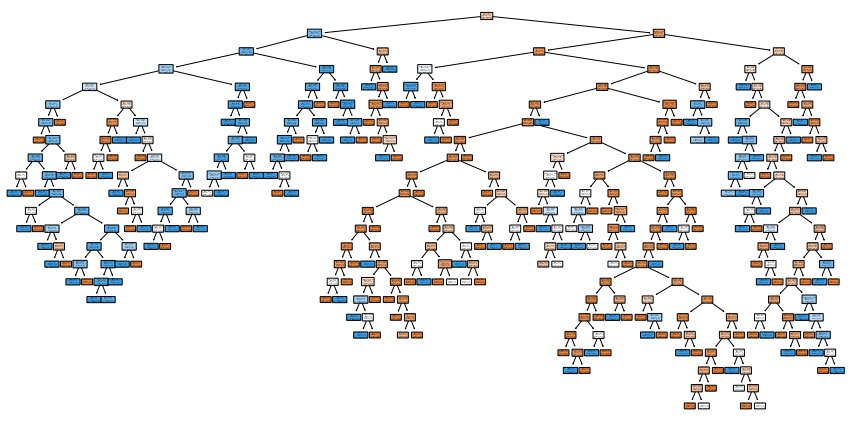

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7.5))
plot_tree(tree_fit, filled=True, rounded=True, class_names=["Survived","Didn't survive"], feature_names=X_train.columns)
plt.show()

In [49]:
prediction = tree.predict(X_test)
prediction

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [50]:
tree.score(X_test, y_test)

0.83

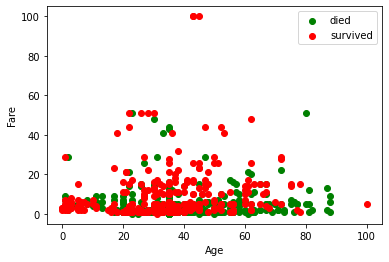

In [51]:
from matplotlib import pyplot as plt
import numpy as np
survived = df_train[df_train['Survived'] == 1]
died = df_train[df_train['Survived'] == 0]

age0 = np.floor(died['Age'] * 100)
fare0 = np.floor(died['Fare'] * 100)
age1 = np.floor(survived['Age'] * 100)
fare1 = np.floor(survived['Fare'] * 100)


plt.scatter(age0, fare0, color="green",label="died")
plt.scatter(age1, fare1, color="red",label="survived")
plt.xlabel("Age")
plt.ylabel("Fare")

plt.legend()
# plt.xticks(np.arange(0, 100,step=10))

In [52]:
survived.sort_values(by="Fare",ascending=False)

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Family_size
679,1,1,0.4500,1.000000,1,0,0.1
258,1,0,0.4375,1.000000,1,0,0.0
737,1,1,0.4375,1.000000,1,0,0.0
341,1,0,0.3000,0.513342,1,0,0.5
88,1,0,0.2875,0.513342,1,0,0.5
...,...,...,...,...,...,...,...
780,1,0,0.1625,0.014110,0,0,0.0
19,1,0,0.3500,0.014102,0,0,0.0
553,1,1,0.2750,0.014102,0,0,0.0
127,1,1,0.3000,0.013940,0,0,0.0


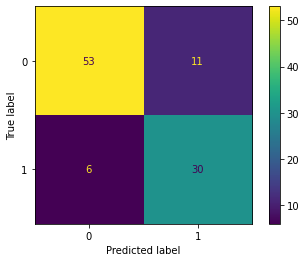

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

print(ConfusionMatrixDisplay.from_predictions(y_test,prediction))

## Actual Truth

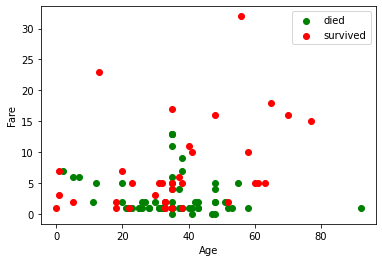

In [54]:
survived = df_test[df_test['Survived'] == 1]
died = df_test[df_test['Survived'] == 0]

age0 = np.floor(died['Age'] * 100)
fare0 = np.floor(died['Fare'] * 100)
age1 = np.floor(survived['Age'] * 100)
fare1 = np.floor(survived['Fare'] * 100)


plt.scatter(age0, fare0, color="green",label="died")
plt.scatter(age1, fare1, color="red",label="survived")
plt.xlabel("Age")
plt.ylabel("Fare")

plt.legend()
# plt.xticks(np.arange(0, 100,step=10))

## Predicted

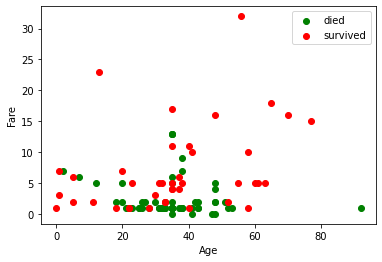

In [55]:
df_test['Survived'] = prediction

survived = df_test[df_test['Survived'] == 1]
died = df_test[df_test['Survived'] == 0]

age0 = np.floor(died['Age'] * 100)
fare0 = np.floor(died['Fare'] * 100)
age1 = np.floor(survived['Age'] * 100)
fare1 = np.floor(survived['Fare'] * 100)


plt.scatter(age0, fare0, color="green",label="died")
plt.scatter(age1, fare1, color="red",label="survived")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend()
